In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()

In [3]:
G.nodes

NodeView(())

In [4]:
# Visualisation helper function
def view_graph(G):
    import warnings
    warnings.filterwarnings("ignore")
    # Print nodes and edges     
    print(f'Nodes in graph: {G.nodes}')
    print(f'Edges in graph: {G.edges}')
    # Create a visualisation using NetworkX and draw using matplotlib
    pos = nx.spring_layout(G)
    # Extract node attributes and display them as labels
    if len(nx.get_node_attributes(G, 'population')) != 0:
        labels = {key: key + ':' + str(value) for (key, value) in nx.get_node_attributes(G, 'population').items()}
        nx.draw(G, pos=pos, with_labels=True, labels=labels)
    else:
        nx.draw(G, pos=pos, with_labels=True)
    # Extract edge attributes and display them as labels    
    if len(nx.get_edge_attributes(G,'distance')) != 0:
        edge_labels = nx.get_edge_attributes(G, 'distance')
        nx.draw_networkx_edge_labels(G, pos=pos, labels = edge_labels)
    plt.figure(figsize=(12,12)) 
    plt.show()

Nodes in graph: [1]
Edges in graph: []


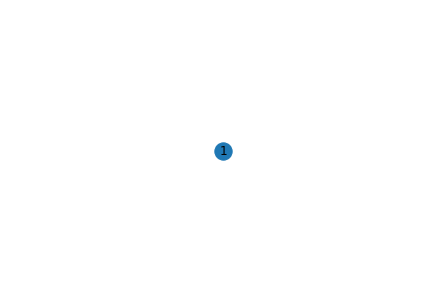

<Figure size 864x864 with 0 Axes>

In [5]:
G.add_node(1)
view_graph(G)

Nodes in graph: [1, 2, 3]
Edges in graph: []


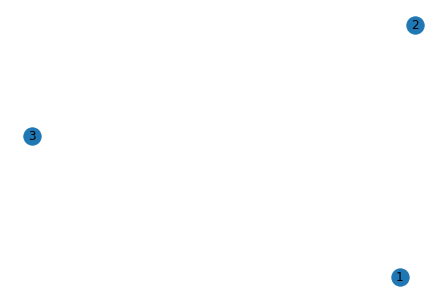

<Figure size 864x864 with 0 Axes>

In [6]:
G.add_nodes_from([2, 3])
view_graph(G)

Nodes in graph: [1, 2, 3]
Edges in graph: [(1, 2)]


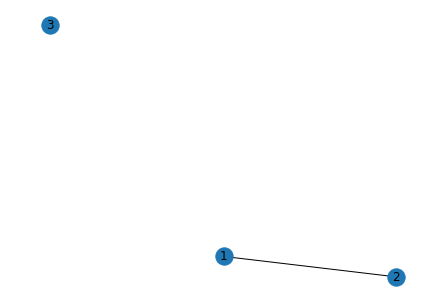

<Figure size 864x864 with 0 Axes>

In [7]:
G.add_edge(1, 2)
view_graph(G)

Nodes in graph: [1, 2, 3]
Edges in graph: [(1, 2), (1, 3), (2, 3)]


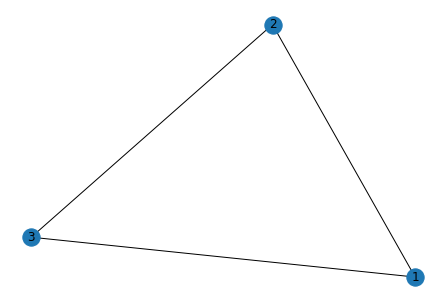

<Figure size 864x864 with 0 Axes>

In [8]:
G.add_edges_from([(1, 3), (2, 3)])
view_graph(G)

Nodes in graph: ['Arthur', 'Jenny', 'Chris']
Edges in graph: [('Arthur', 'Jenny'), ('Arthur', 'Chris'), ('Jenny', 'Chris')]


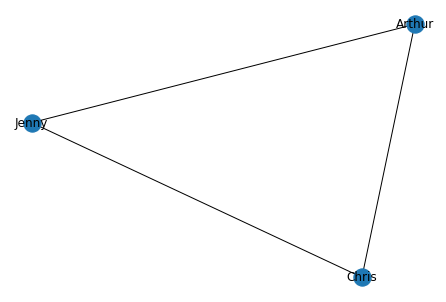

<Figure size 864x864 with 0 Axes>

In [10]:
friends = nx.Graph([('Arthur', 'Jenny'), ('Jenny', 'Chris'), ('Chris', 'Arthur')])
view_graph(friends)

In [13]:
list(friends.neighbors('Arthur'))

['Jenny', 'Chris']

A remoção de um nó remove os vértices ligados a ele.

Nodes in graph: ['Jenny', 'Chris']
Edges in graph: [('Jenny', 'Chris')]


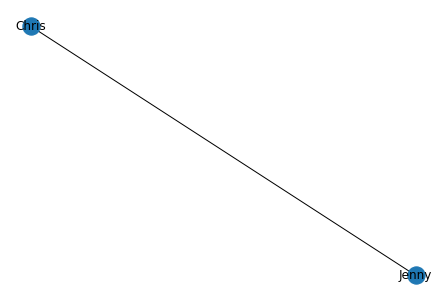

<Figure size 864x864 with 0 Axes>

In [14]:
friends.remove_node('Arthur')
view_graph(friends)

A remoção de um vértice mantém os nós.

In [16]:
friends.remove_edge('Chris',  'Jenny')
view_graph(friends)
#Existem funções para remoção em bulk tanto de nodes quanto de edges

NetworkXError: The edge Chris-Jenny is not in the graph

In [17]:
help(friends)

Help on Graph in module networkx.classes.graph object:

class Graph(builtins.object)
 |  Graph(incoming_graph_data=None, **attr)
 |  
 |  Base class for undirected graphs.
 |  
 |  A Graph stores nodes and edges with optional data, or attributes.
 |  
 |  Graphs hold undirected edges.  Self loops are allowed but multiple
 |  (parallel) edges are not.
 |  
 |  Nodes can be arbitrary (hashable) Python objects with optional
 |  key/value attributes. By convention `None` is not used as a node.
 |  
 |  Edges are represented as links between nodes with optional
 |  key/value attributes.
 |  
 |  Parameters
 |  ----------
 |  incoming_graph_data : input graph (optional, default: None)
 |      Data to initialize graph. If None (default) an empty
 |      graph is created.  The data can be any format that is supported
 |      by the to_networkx_graph() function, currently including edge list,
 |      dict of dicts, dict of lists, NetworkX graph, NumPy matrix
 |      or 2d ndarray, SciPy sparse 

## End

Directed Graph: Grafo onde a direção do vértice importa e não se pode assumir, a-priori, que as relações são mútuas.  
Começamos então a falar de incoming e outgoing edges.

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


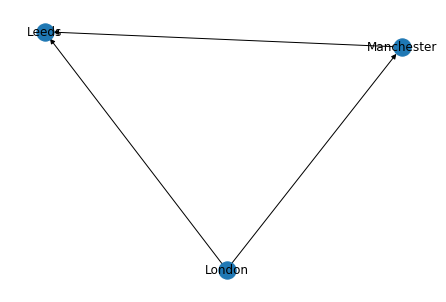

<Figure size 864x864 with 0 Axes>

In [18]:
uk_places = nx.DiGraph([('London', 'Manchester'), ('Manchester', 'Leeds'), ('London', 'Leeds')])
view_graph(uk_places)

In [19]:
#Essas funções não estão disponíveis em undirected graphs
print(list(uk_places.successors('London')))
print(list(uk_places.predecessors('London')))

['Manchester', 'Leeds']
[]


Subgrafo: Surge a partir do grafo original, sem modifica-lo. Edges conectadas a nós que não fazem parte do subgrafo são excluídas.

Nodes in graph: ['London', 'Manchester']
Edges in graph: [('London', 'Manchester')]


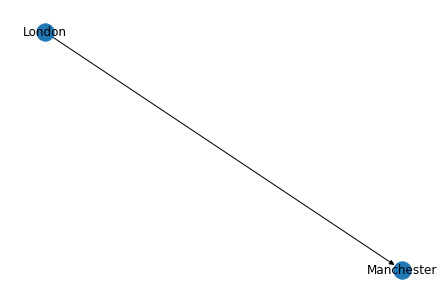

<Figure size 864x864 with 0 Axes>

In [20]:
subgraph = uk_places.subgraph(['London', 'Manchester'])
view_graph(subgraph)

Path = Source + Intermediate + Destination  
Em um directed graph, o path deve seguir a direção das setas.

Conectividade: Ligação entre os nós.  
Conectividade forte (apenas em DiGraphs): Se a caminhos de e para todos os nós.

Nodes in graph: ['Northampton', 'Leicester', 'Loughborough']
Edges in graph: [('Northampton', 'Leicester'), ('Leicester', 'Loughborough')]


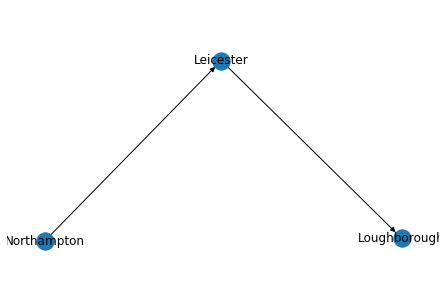

<Figure size 864x864 with 0 Axes>

In [21]:
uk_places_new = nx.DiGraph([('Northampton', 'Leicester'), ('Leicester', 'Loughborough')])
view_graph(uk_places_new)

Ao combinar os dois grafos em um, eles viram connected components.

Nodes in graph: ['London', 'Manchester', 'Leeds', 'Northampton', 'Leicester', 'Loughborough']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds'), ('Northampton', 'Leicester'), ('Leicester', 'Loughborough')]


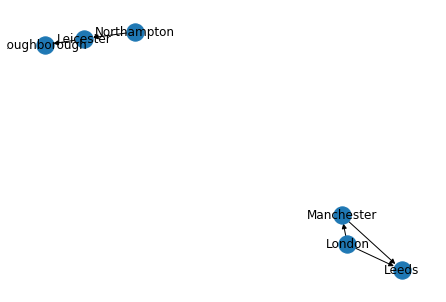

<Figure size 864x864 with 0 Axes>

In [22]:
combined_places = nx.union(uk_places, uk_places_new)
view_graph(combined_places)

Nodes in graph: ['old-London', 'old-Manchester', 'old-Leeds', 'new-London', 'new-Manchester', 'new-Leeds']
Edges in graph: [('old-London', 'old-Manchester'), ('old-London', 'old-Leeds'), ('old-Manchester', 'old-Leeds'), ('new-London', 'new-Manchester'), ('new-Leeds', 'new-London'), ('new-Leeds', 'new-Manchester')]


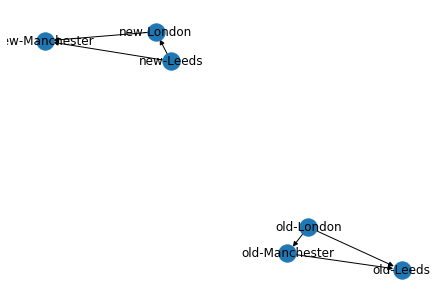

<Figure size 864x864 with 0 Axes>

In [23]:
uk_places_to_intersect = nx.DiGraph([('London', 'Manchester'), 
                                     ('Leeds', 'London'), 
                                     ('Leeds', 'Manchester')])

#Quando uno grafos com nós de mesmo nome, é preciso renomeá-los
combined = nx.union(uk_places, uk_places_to_intersect, rename=('old-', 'new-'))
view_graph(combined)

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester')]


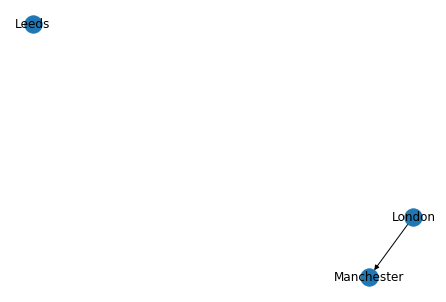

<Figure size 864x864 with 0 Axes>

In [24]:
intersected = nx.intersection(uk_places, uk_places_to_intersect)
view_graph(intersected)

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


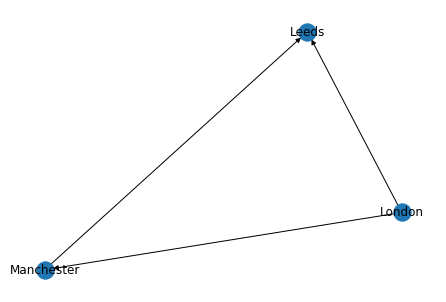

<Figure size 864x864 with 0 Axes>

In [25]:
view_graph(uk_places)

Grau de um nó: Número de vertices conectados a ele

In [27]:
uk_places.degree

DiDegreeView({'London': 2, 'Manchester': 2, 'Leeds': 2})

Em DiGraphs, existem graus de entrada e saída

In [30]:
print('In: ' + str(uk_places.in_degree))
print('Out: ' + str(uk_places.out_degree))
#Podem ser chamados como propriedade ou como função

In: [('London', 0), ('Manchester', 1), ('Leeds', 2)]
Out: [('London', 2), ('Manchester', 1), ('Leeds', 0)]


In [31]:
uk_places.out_degree(['Manchester', 'Leeds'])

OutDegreeView({'Manchester': 1, 'Leeds': 0})

## End

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


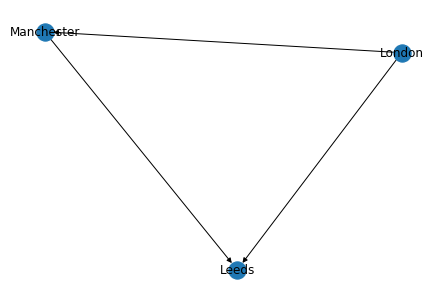

<Figure size 864x864 with 0 Axes>

In [32]:
view_graph(uk_places)

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


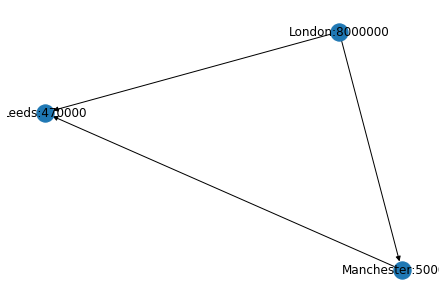

<Figure size 864x864 with 0 Axes>

In [37]:
uk_places.nodes['London']['population'] = 8000000
uk_places.nodes['Manchester']['population'] = 500000
uk_places.nodes['Leeds']['population'] = 470000
view_graph(uk_places)

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


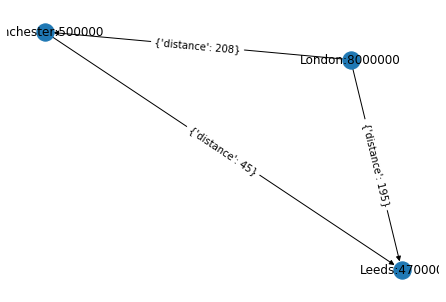

<Figure size 864x864 with 0 Axes>

In [38]:
uk_places.edges['London', 'Leeds']['distance'] = 195
uk_places.edges['London', 'Manchester']['distance'] = 208
uk_places.edges['Manchester', 'Leeds']['distance'] = 45
view_graph(uk_places)

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


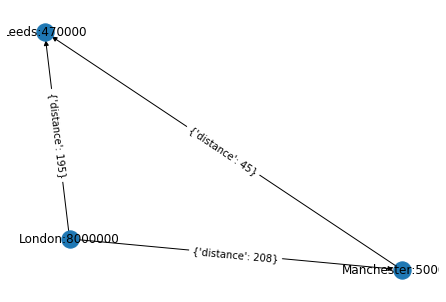

<Figure size 864x864 with 0 Axes>

In [39]:
#Chave do dict é o nome de um nó
node_attributes = {'London': {'population': 8000000},
                  'Manchester': {'population': 500000},
                  'Leeds': {'population': 470000}
                  }

nx.set_node_attributes(uk_places, node_attributes)

#Chave do dict é uma tupla com nós de partida e chegada
edge_attributes = {('London', 'Leeds'): {'distance': 195},
         ('London', 'Manchester'): {'distance': 208},
         ('Manchester', 'Leeds'): {'distance': 45},
        }

nx.set_edge_attributes(uk_places, edge_attributes)

view_graph(uk_places)

Adjacency list: Cada linha começa com um nó de partida e continua com nós para os quais ele vai. Não permite armazenar atributos.

In [29]:
! type cities.adjlist

#C:\Users\akroc\Anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py -f C:\Users\akroc\AppData\Roaming\jupyter\runtime\kernel-ef3384c3-7fa8-4c4c-97af-46ae18f850bc.json
# GMT Sun Dec 30 22:33:46 2018
# 
London Manchester Leeds
Manchester Leeds
Leeds


In [40]:
! type cities.adjlist

O sistema nÆo pode encontrar o arquivo especificado.


Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


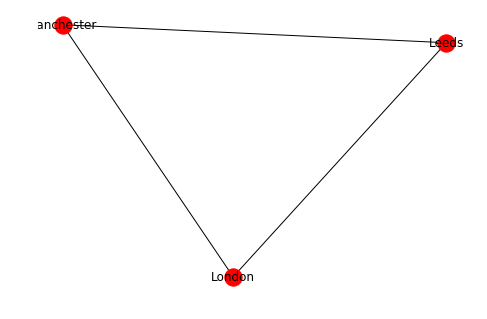

<Figure size 864x864 with 0 Axes>

In [30]:
uk_places_adjlist = nx.read_adjlist('cities.adjlist')
view_graph(uk_places_adjlist)

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


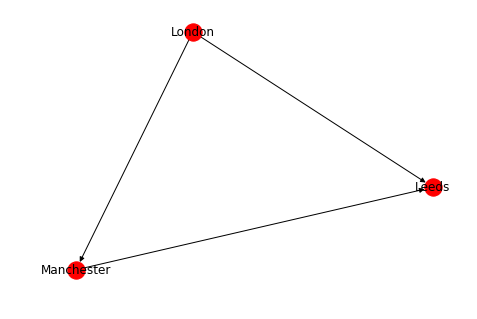

<Figure size 864x864 with 0 Axes>

In [31]:
#Por padrão o construtor acha que é undirected
uk_places_adjlist = nx.read_adjlist('cities.adjlist', create_using=nx.DiGraph)
view_graph(uk_places_adjlist)

In [42]:
nx.write_adjlist(uk_places, 'cities.adjlist')

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


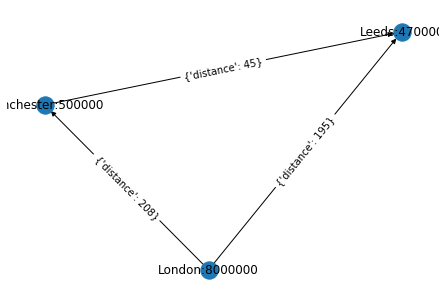

<Figure size 864x864 with 0 Axes>

In [43]:
uk_places = nx.DiGraph([('London', 'Manchester'), ('Manchester', 'Leeds'), ('London', 'Leeds')])

node_attributes = {'London': {'population': 8000000},
                  'Manchester': {'population': 500000},
                  'Leeds': {'population': 470000}
                  }
nx.set_node_attributes(uk_places, node_attributes)

edge_attributes = {('London', 'Leeds'): {'distance': 195},
         ('London', 'Manchester'): {'distance': 208},
         ('Manchester', 'Leeds'): {'distance': 45},
        }
nx.set_edge_attributes(uk_places, edge_attributes)

view_graph(uk_places)

In [44]:
nx.write_gml(uk_places, 'cities.gml')
nx.write_graphml(uk_places, 'cities.graphml')

In [45]:
! type cities.gml

graph [
  directed 1
  node [
    id 0
    label "London"
    population 8000000
  ]
  node [
    id 1
    label "Manchester"
    population 500000
  ]
  node [
    id 2
    label "Leeds"
    population 470000
  ]
  edge [
    source 0
    target 1
    distance 208
  ]
  edge [
    source 0
    target 2
    distance 195
  ]
  edge [
    source 1
    target 2
    distance 45
  ]
]


In [46]:
! type cities.graphml

<?xml version='1.0' encoding='utf-8'?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <key attr.name="distance" attr.type="long" for="edge" id="d1" />
  <key attr.name="population" attr.type="long" for="node" id="d0" />
  <graph edgedefault="directed">
    <node id="London">
      <data key="d0">8000000</data>
    </node>
    <node id="Manchester">
      <data key="d0">500000</data>
    </node>
    <node id="Leeds">
      <data key="d0">470000</data>
    </node>
    <edge source="London" target="Manchester">
      <data key="d1">208</data>
    </edge>
    <edge source="London" target="Leeds">
      <data key="d1">195</data>
    </edge>
    <edge source="Manchester" target="Leeds">
      <data key="d1">45</data>
    </edge>
  </graph>
</graphml>
